## Implementing multiple linear regression using numpy

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [27]:
df=pd.read_excel('student.csv.xlsx')

x1= df['Math'].values
x2= df['Reading'].values
y= df['Writing'].values
df.count

Text(0.5,0,'writing')

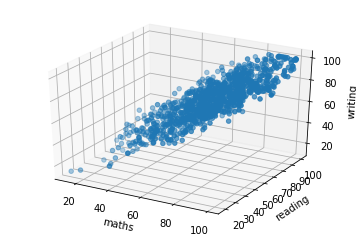

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, x2, y)
ax.set_xlabel('maths')
ax.set_ylabel('reading')
ax.set_zlabel('writing')

In [29]:
alpha=0.0001
x0=np.ones((1000,1))
x_final=np.concatenate((x0,x1.reshape(1000,1),x2.reshape(1000,1)),axis=1)
beta= np.zeros((1,3))

print(x_final.shape)
print(beta.shape)

(1000, 3)
(1, 3)


In [30]:
y_pred=np.dot(x_final,beta.T)
cost = np.sum((y_pred-y)**2)/2*1000

In [31]:
cost

2470110000000.0

In [32]:
beta=np.random.rand(1,3)
for i in range(100000):
    y_pred=np.dot(x_final,beta.T)
    cost= np.sum((y_pred-y.reshape(1000,1))**2)/2*1000
    diff= (y_pred-y.reshape(1000,1))
    derivative= 2*np.dot(diff.T,x_final)/1000
    beta= (beta)-alpha*(derivative)
print(beta)

[[-0.65097888  0.09218256  0.90303247]]


## Sklearn

In [33]:
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error, r2_score
lm = linear_model.LinearRegression()
y=y.reshape(1000,1)
lm.fit(x_final[:,1:],y)
y_pred = lm.predict(x_final[:,1:])

print('Coefficients: \n', lm.coef_)
print('Intercept: \n', lm.intercept_)
print("Mean squared error: %.2f"% mean_squared_error(y, y_pred))

Coefficients: 
 [[0.09600221 0.91049989]]
Intercept: 
 [-1.46243738]
Mean squared error: 20.91
